# Lab 11: Springs and Waves

_Group Members_ :

In this lab you will investigate springs and mechanical waves.  This is the fourth of the four computation focused labs throughout the semester, so you will be building upon all of the computational skills and techniques you have been learning and developing this semester.

Run the cell below to import the necessary libraries.  

**<font color=green> Note: For the online version, make sure that the ffmpeg path is correct for your machine.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from math import *

rc('animation', html='html5')  # this lets us call the animation object directly, without having to explicitly compile it

# Change the path to ffmpeg
# Windows users can get it at https://ffmpeg.zeranoe.com/builds/
plt.rcParams['animation.ffmpeg_path'] = r'???'



class ball:
    
    def __init__(self, m=1, r=np.array([0,0,0]), v=np.array([0,0,0]), a=np.array([0,0,0])):
        
        self.m = m
        
        self.r = r
        self.v = v
        self.a = a
        
        self.r_array = np.array([])
        self.v_array = np.array([])
        self.a_array = np.array([])

def init():
    line.set_data([], [])
    return(line)

def animate_pos_plot(i):
    x = times[:i]
    y = ball_1.r_array[0:i, 1]
    line.set_data(x, y)
    return (line)

def animate_all_plots(i):
    t = times[:i]
    y = ball_1.r_array[0:i, 1]
    vy = ball_1.v_array[0:i, 1]
    ay = ball_1.a_array[0:i, 1]
    y_line.set_data(t, y)
    vy_line.set_data(t, vy)
    ay_line.set_data(t, ay)
    return (y_line, vy_line, ay_line)

def animate_ball(i):
    x = ball_1.r_array[i, 0]
    y = ball_1.r_array[i, 1]
    line.set_data(x, y)
    return (line)

def animate_ball_list(ball_list):
    def animation_function(i):
        x = []
        y = []
        for j in range(0,len(ball_list)):
            x.append(ball_list[j].r_array[i, 0])
            y.append(ball_list[j].r_array[i, 1])
        line.set_data(x, y)
        return (line)
    return animation_function

# Part One: Mass on a Spring (Physical)
---
This part of the lab is intended to give you a little bit of physical intuition. It is not intended to take up a lot of time.

The ideal spring, bound to move in one direction obeys Hooke's Law. Hooke's Law states that the amount of force a spring exerts is proportional to the amount of deformation the spring experiences. Expressed mathematically that looks like

$F = -k\,(L-L_0)\,\hat{r} = -k\,\Delta L\,\hat{r}$

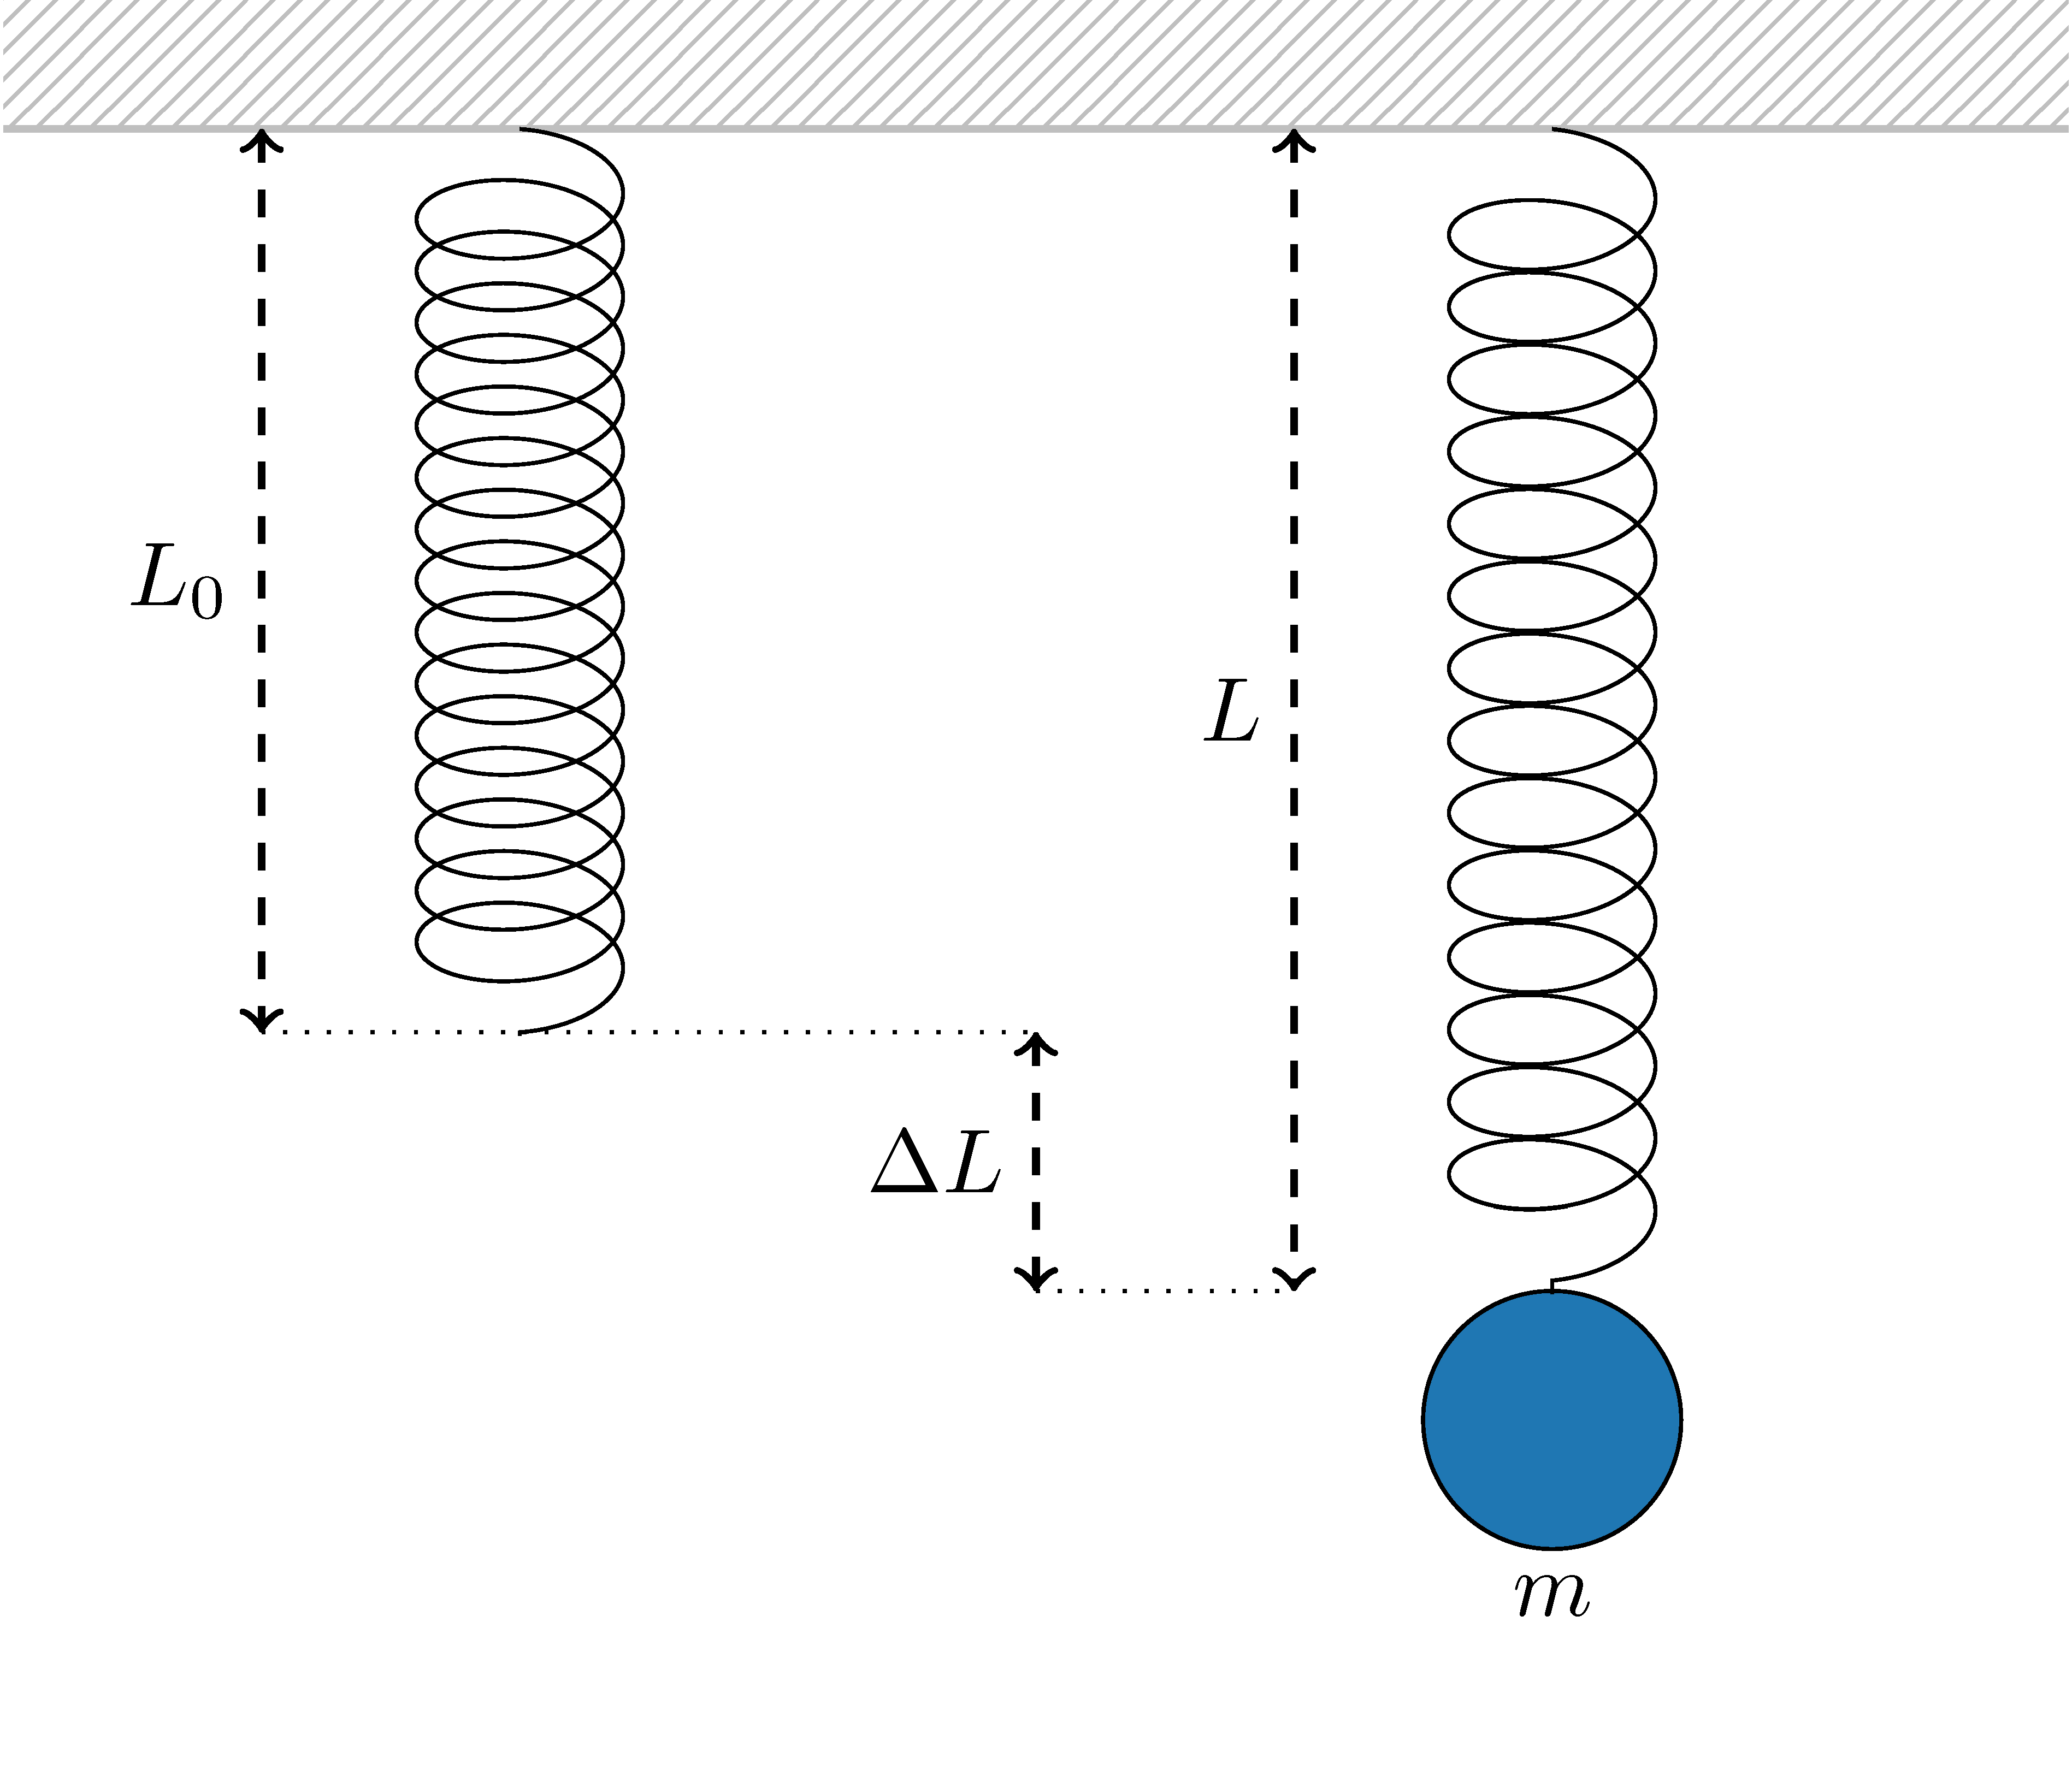

where F is the force exerted by the spring, k is the spring constant (basically a material constant, to be determined for each particular spring), and delta x is the change in the spring's length. The negative sign indicates that the force acts in the opposite direction of the deformation: If we compress the spring, it wants to push out, and if we pull the spring and lengthen it, it wants to tighten up and pull back in. Since it always wants to return the system to an equilibrium position, we call it a **Restoring Force**

At your lab station you will find a set of masses and a spring. 

**<font color=green> Note: For the online version of this course, the mass on the spring will look like the figure above.**

**<font color=blue>Problem 11.1: List the forces that act on the mass hanging from the spring when it is at rest, and which direction they act in.**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 11.2: Hang the spring vertically from a hook. Measure its length and record it below. Hang a few different masses on the end of the spring, and record the stretched length of the spring, for a few different masses.**
 
**<font color=green> Note: For the online version of this course, these values will be given to you.**    

| Mass | $L$ |  
|------|-----|
| 100g |     | 
| 250g |     |
| 500g |     |

**<font color=red>Code Task 11.1: Use this data to calculate the spring constant, k, for your spring.**

In [ ]:
# Write the code to calculate k here
# Select this cell and press Shift+Enter to run it
# Any output will be displayed below.

Now, pull on the spring, and lengthen it by a centimeter or two. 

**<font color=green> Note: For the online version of this course, you will be given a video of this.**

**<font color=blue>Problem 11.3: Describe the motion of the mass on the end of the spring.**

_Double click this cell to begin editing. Write your answer here._

This type of motion is a resonant phenomenon known as **Simple Harmonic Motion** and is commonly modeled with a sine function with a characteristic frequency, $f$:

$$L= A\sin(2\pi\, f \,t) +L_0$$

Here the characteristic resonant frequency, $f$ can be expressed as:

$$f= \frac{1}{2\pi}\sqrt\frac{k}{m}$$

Notice that the frequency of the motion depends on only the spring constant and the mass, but not the deformation of the spring. This is the single resonant mode for the system.

**<font color=blue>Problem 11.4: Pull the spring, and use a stopwatch to measure the frequency of the mass's motion, using a few different masses.** (A quick way to do this is to time how long it takes the mass to complete 10 oscillations, and divide the number of oscillations by the full time you measured.)

**<font color=green> Note: For the online version of this course, you will be given this data.** 

| Mass | Total Time | Frequency |
|------|------------|-----------|
| 100g |            |           |
| 250g |            |           |
| 500g |            |           |

**<font color=red>Code Task 11.2: Use your frequency and mass data to determine the spring constant, k, for your spring. Also compare it to the value you calculated for k in Code Task 1.** You will use this in the simulation in Part 2.

In [ ]:
# Write the code to calculate k here
# Select this cell and press Shift+Enter to run it
# Any output will be displayed below.

**<font color=blue>Problem 11.5: Compare your two methods for determining spring constant (code task 1 and code task 2).**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 11.6: What happens if you don't pull the mass straight down, but at a small angle? Describe what happens to the motion of the mass, the forces that act on it, and how they change in time.**
    
**<font color=green> Note: For the online version of this course, you will be given a video for this.**

_Double click this cell to begin editing. Write your answer here._

# Part Two: Simulating a Mass on a Spring
---
Let's compare the physical spring system to a simulated one. Edit the functions below to define the the gravitational force and the spring force. Here, $m$ is the mass of the object, $dr$ is a vector displacement from the object to the end of the spring, $L_0$ is the (scalar) length of the spring at rest, and $k$ is the spring constant.

**<font color=red>Code Task 11.3: Edit the two functions below so that they output the gravitational force and the spring force.**

In [ ]:
g = 9.81  # m/s^2

def grav_force(m):
    '''
    This force on an object of mass m due to gravity.
    Note that it only applies force in the y direction.
    '''
    output_force = np.zeros(3) # initialze the returned force array with zeros
    output_force[1] = ???  ### Your code to define the gravitational force goes here ###
    
    return output_force

def spring_force(dr, L0, k):
    '''
    This force depends on the difference between the two masses.
    dr is the displacement of the object from the end of the spring
    L0 is the relaxed length of the spring.
    k is the spring constant.
    '''
    L = np.sqrt(dr[0]**2 + dr[1]**2 + dr[2]**2)  # length of the stretched spring
    unit_vec = dr / L  # displacement direction as a unit vector
    
    output_force = ???  ### Your code to define the spring force using Hooke's law goes here ###
    
    return output_force

Next we will use these forces to run the simulation. Let one end of the spring be at the origin, so the initial $y$ position of the mass will be negative. Set the weight's initial position, the weight's mass, the length of the resting spring, and the spring constant based off your measurements from Part 1. Also write the equation to update the acceleration using the funcitons defined above. 

**<font color=red>Code Task 11.4: Write the line in the code block below that updates the acceleration of the ball. Be sure to include both the gravitational and spring forces. Additionally, input the experimental values from Part 1, and run the simulation.**

In [ ]:
ball_1 = ball(m=???, r=np.array([0,???,0]))  # Your measured mass and initial position
spring_end = np.array([0,0,0])
L0 = ???  # Your measured L0
k = ???  # Your measured k

T = 10
dt = 0.05
times = np.arange(0, T+dt, dt)

N = times.size

ball_1.a_array = np.empty((N,3))
ball_1.a_array[0] = ball_1.a
ball_1.v_array = np.empty((N,3))
ball_1.v_array[0] = ball_1.v
ball_1.r_array = np.empty((N,3))
ball_1.r_array[0] = ball_1.r

i = 1
for t in times[1:]:
    
    # first update the accelerations
    dr = ball_1.r - spring_end
    #ball_1.a = ???                              ### Your code goes here (use dr from above) ###    
    ball_1.a = (grav_force(ball_1.m) + spring_force(dr, L0, k))/ball_1.m
    # then append the new value to the list
    ball_1.a_array[i] = ball_1.a
    
    # second update the velocities
    ball_1.v = ball_1.v + ball_1.a * dt
    # then append the new value to the list
    ball_1.v_array[i] = ball_1.v  
    
    # third update the positions
    ball_1.r = ball_1.r + ball_1.v * dt
    # then append the new value to the list
    ball_1.r_array[i] = ball_1.r
    
    # update iteration count
    i = i + 1

**<font color=red>Code Task 11.5: Run the code below to plot the acceleration, velocity, and position determined in code task 4.**

In [ ]:
fig, axs = plt.subplots(3,1)

axs[0].plot(times, ball_1.a_array[:,1], '.')
axs[1].plot(times, ball_1.v_array[:,1], '.')
axs[2].plot(times, ball_1.r_array[:,1], '.')
axs[0].set_ylabel('Acceleration')
axs[0].set_xlabel('Time')
axs[1].set_ylabel('Velocity')
axs[1].set_xlabel('Time')
axs[2].set_ylabel('Position')
axs[2].set_xlabel('Time')

fig.set_size_inches(12,8)
fig.tight_layout()

**<font color=blue>Problem 11.7: What do you notice about the peaks and the troughs between the position, velocity, and acceleration graphs?**

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 11.6: Run the code cell below to create and view an animation of of the system.**

In [ ]:
fig, axs = plt.subplots()
axs.set_xlim((min(np.min(ball_1.r_array[:,0]),-1) - 0.1*np.abs(np.min(ball_1.r_array[:,0])),
               max(np.max(ball_1.r_array[:,0]),1) + 0.1*np.abs(np.max(ball_1.r_array[:,0]))))
axs.set_ylim((np.min(ball_1.r_array[:,1]) - 0.1*np.abs(np.min(ball_1.r_array[:,1])),
               max(np.max(ball_1.r_array[:,1]),0) + 0.1*np.abs(np.max(ball_1.r_array[:,1])))
             )
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=24, lw=2)
plt.close()

anim = animation.FuncAnimation(fig, animate_ball, init_func=init, frames=N, interval=40)

anim

**<font color=blue>Problem 11.8: Estimate the frequency of the oscillation from the plot. How does it compare to the frequency physical system you measured in Part 1?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 11.9: If you change the mass, what happens to the oscillation frequency? What if you change the initial $y$ displacement?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 11.10: Try changing the initial $x$ coordinate of the mass, rerun the code. In a few words, what do you see? Is it easier to solve this system analytically or write code to simulate it?**

_Double click this cell to begin editing. Write your answer here._

# Part Three: Multiple Springs
---
Let's start out with a simple system consisting of a few masses and springs.

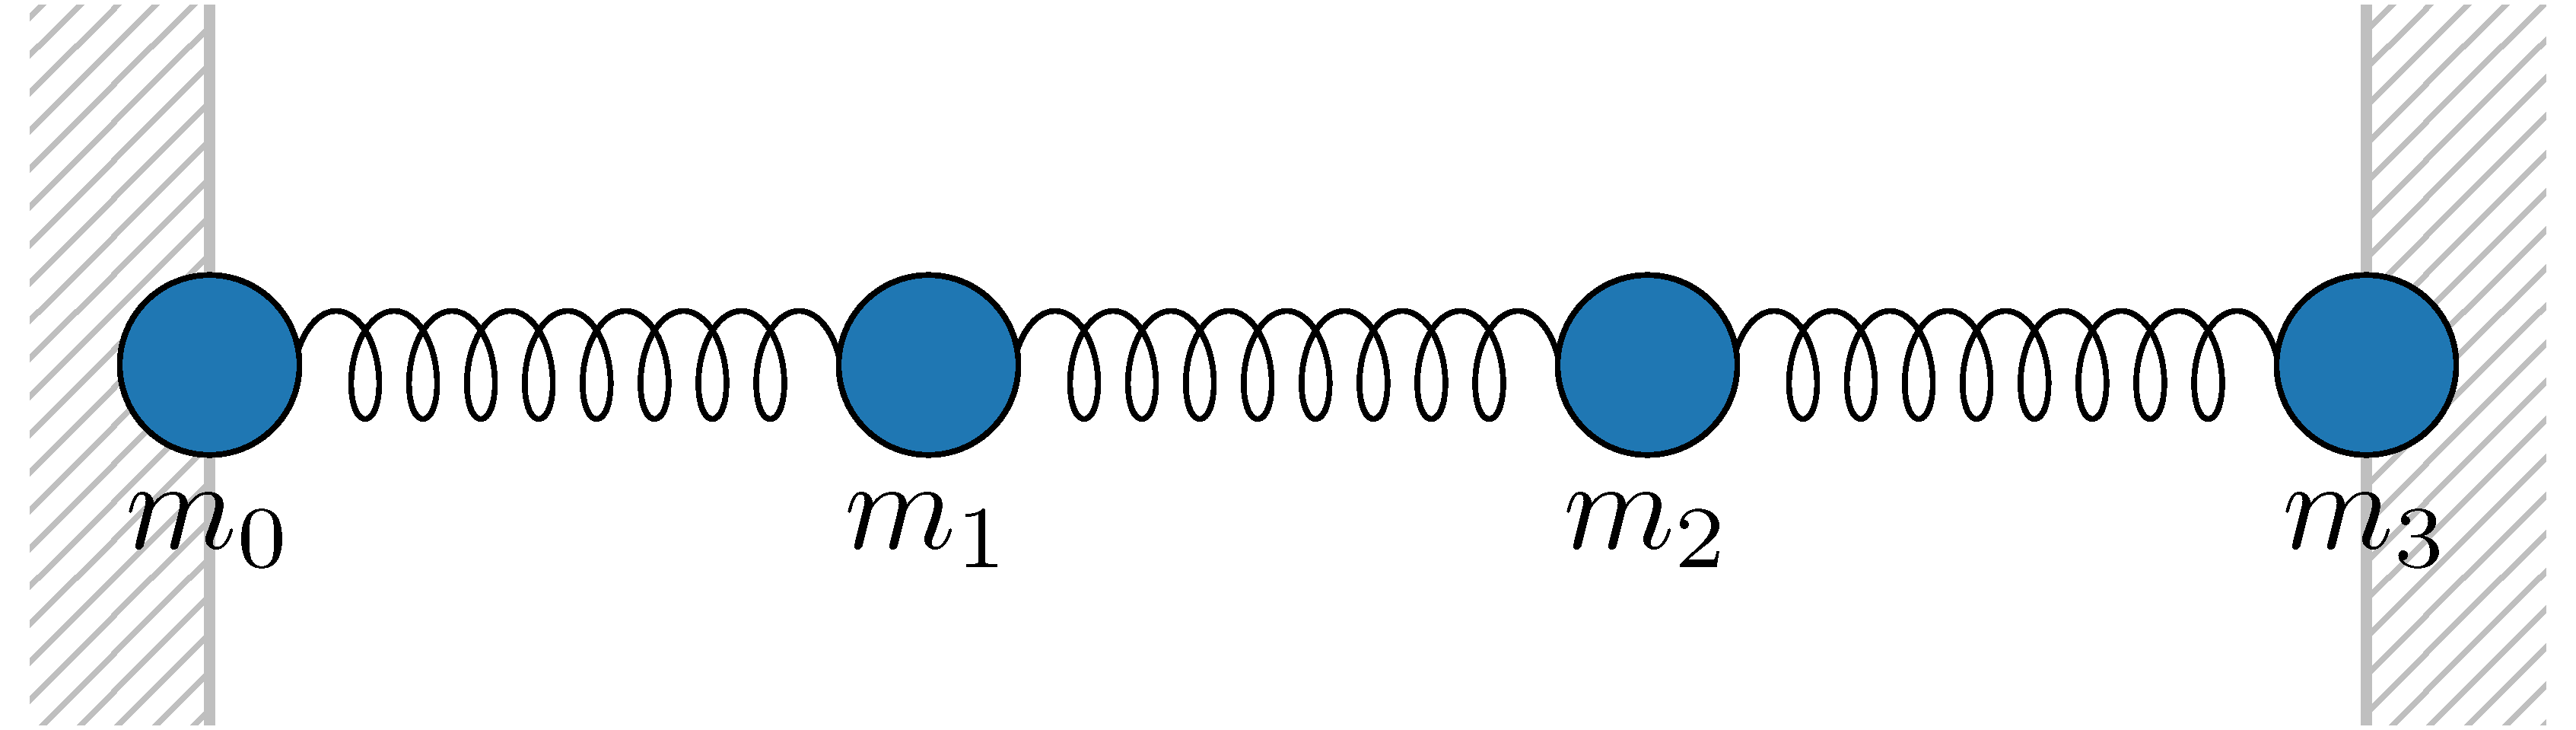
    
Here, the outer two masses are stationary (because this is easier to code), but the inner two masses can move. To simulate this, we will create an array of equal masses equally spaced in the $x$ direction. To make this simple, we will ignore gravity and let $L_0$ equal zero. We will compare two different initial conditions. For the first, the two inner masses will both start at the same positive position, and for the second, one mass will start at a positive position, and the other will start at an equal negative position. The stationary masses on the edges should have a $y$ coordinate of zero.

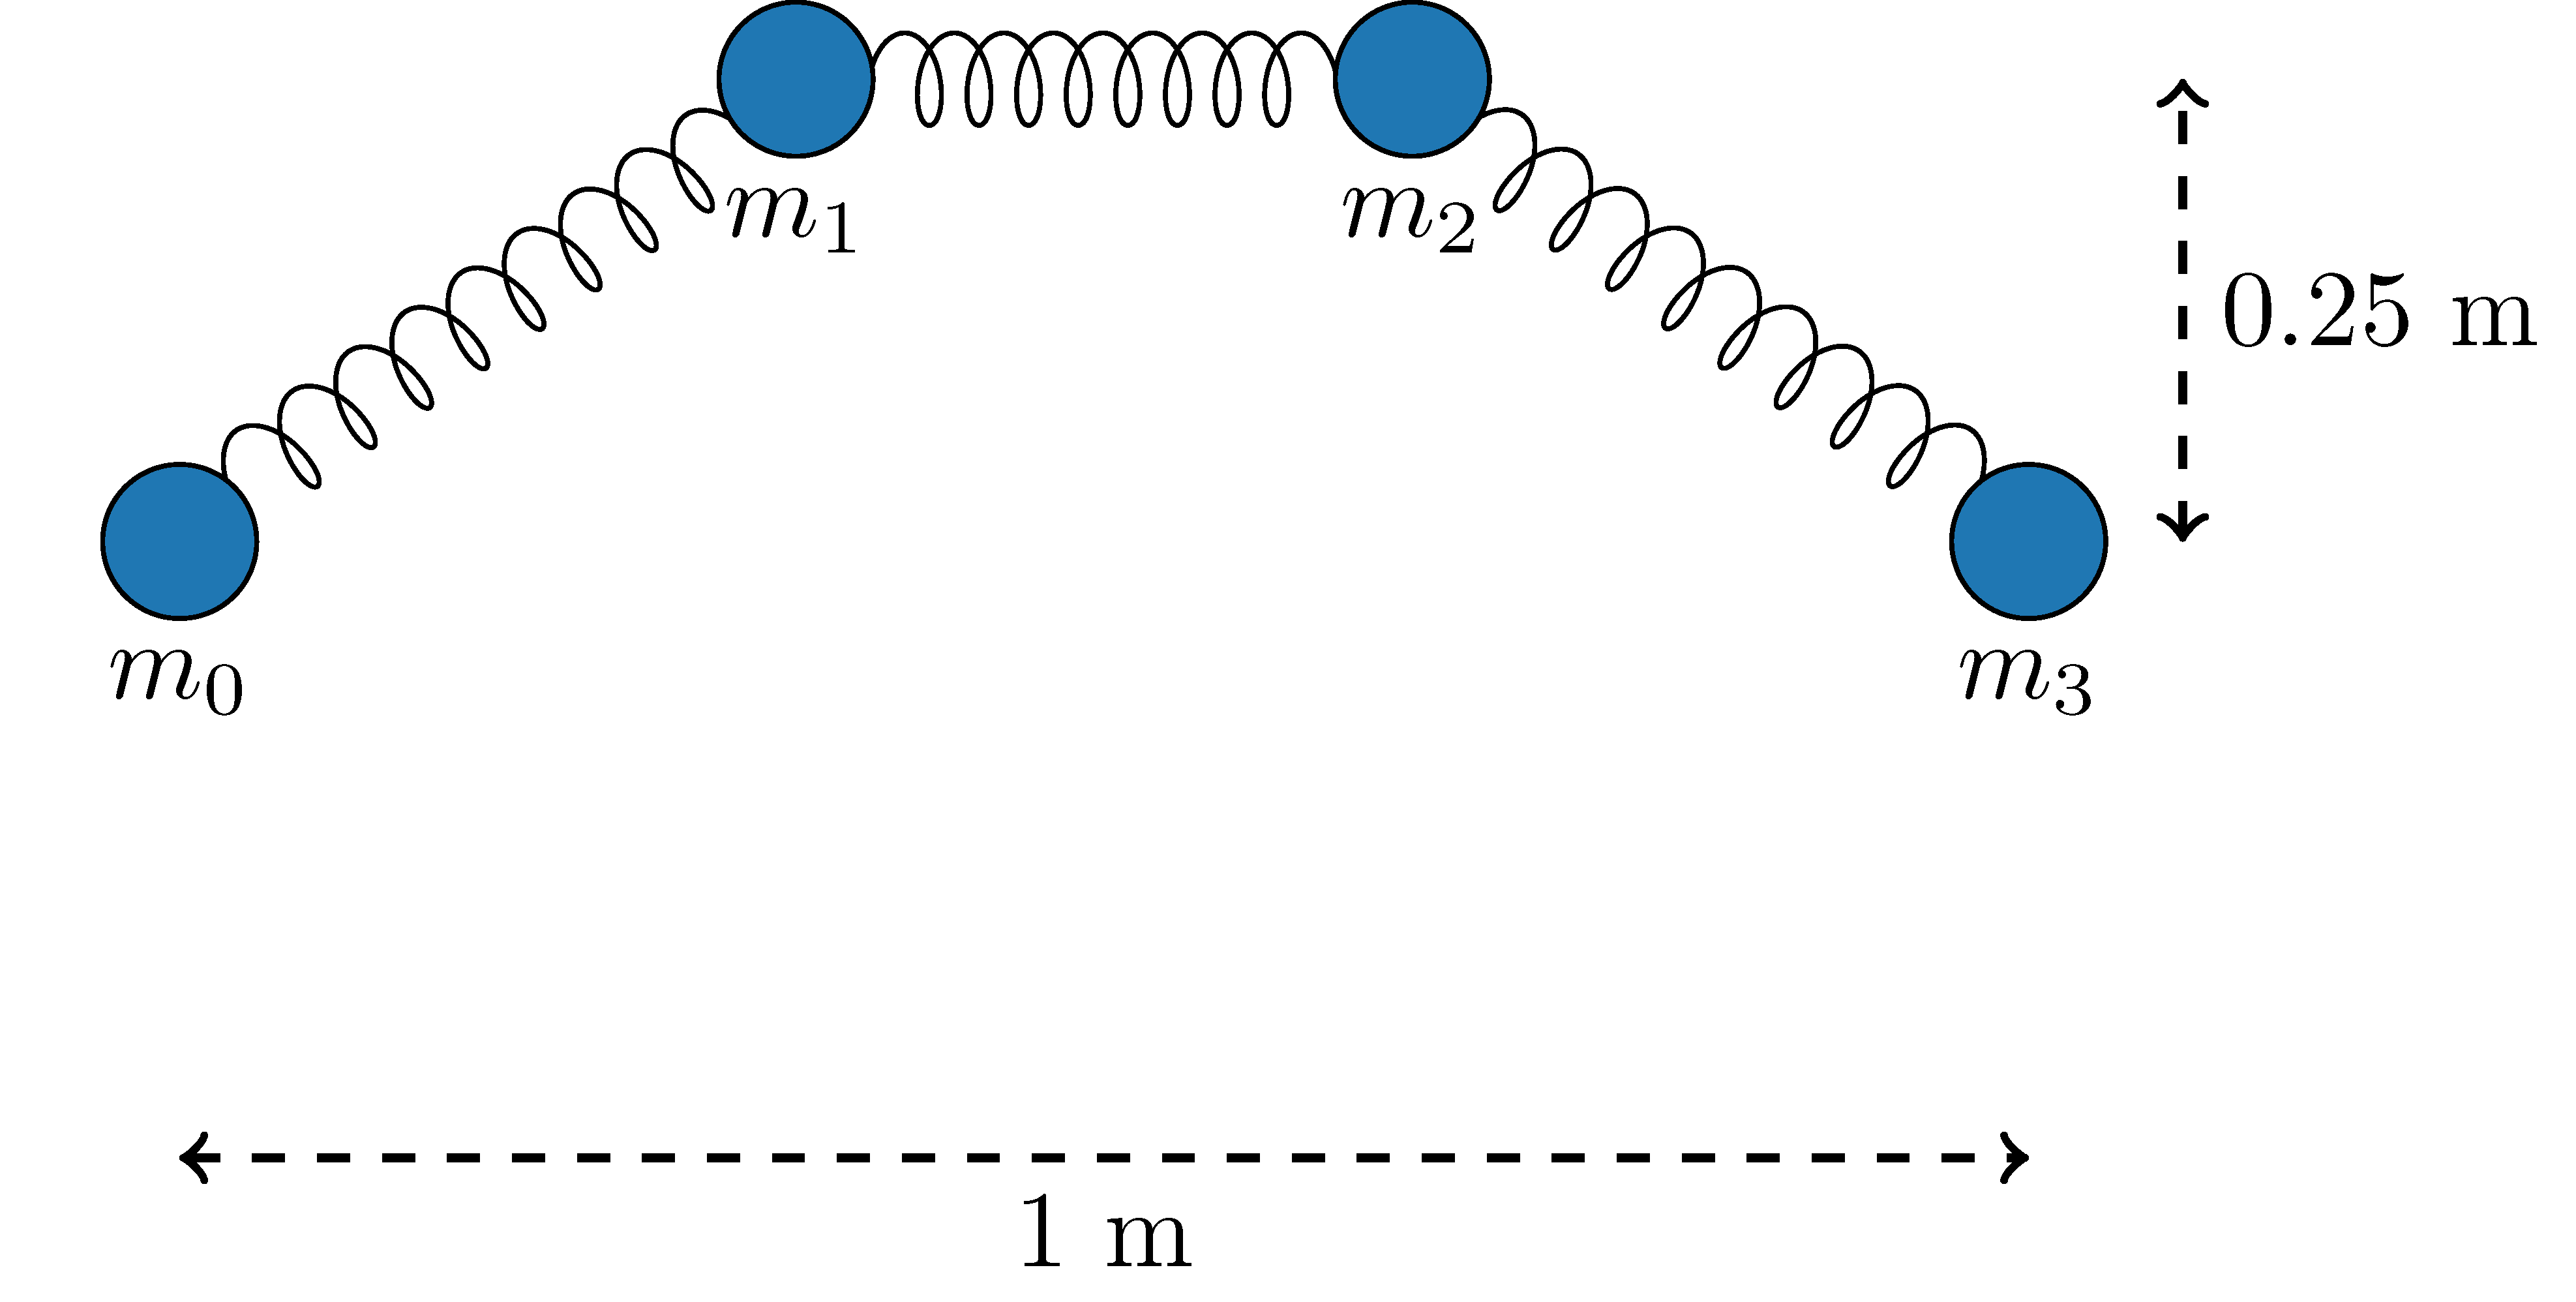
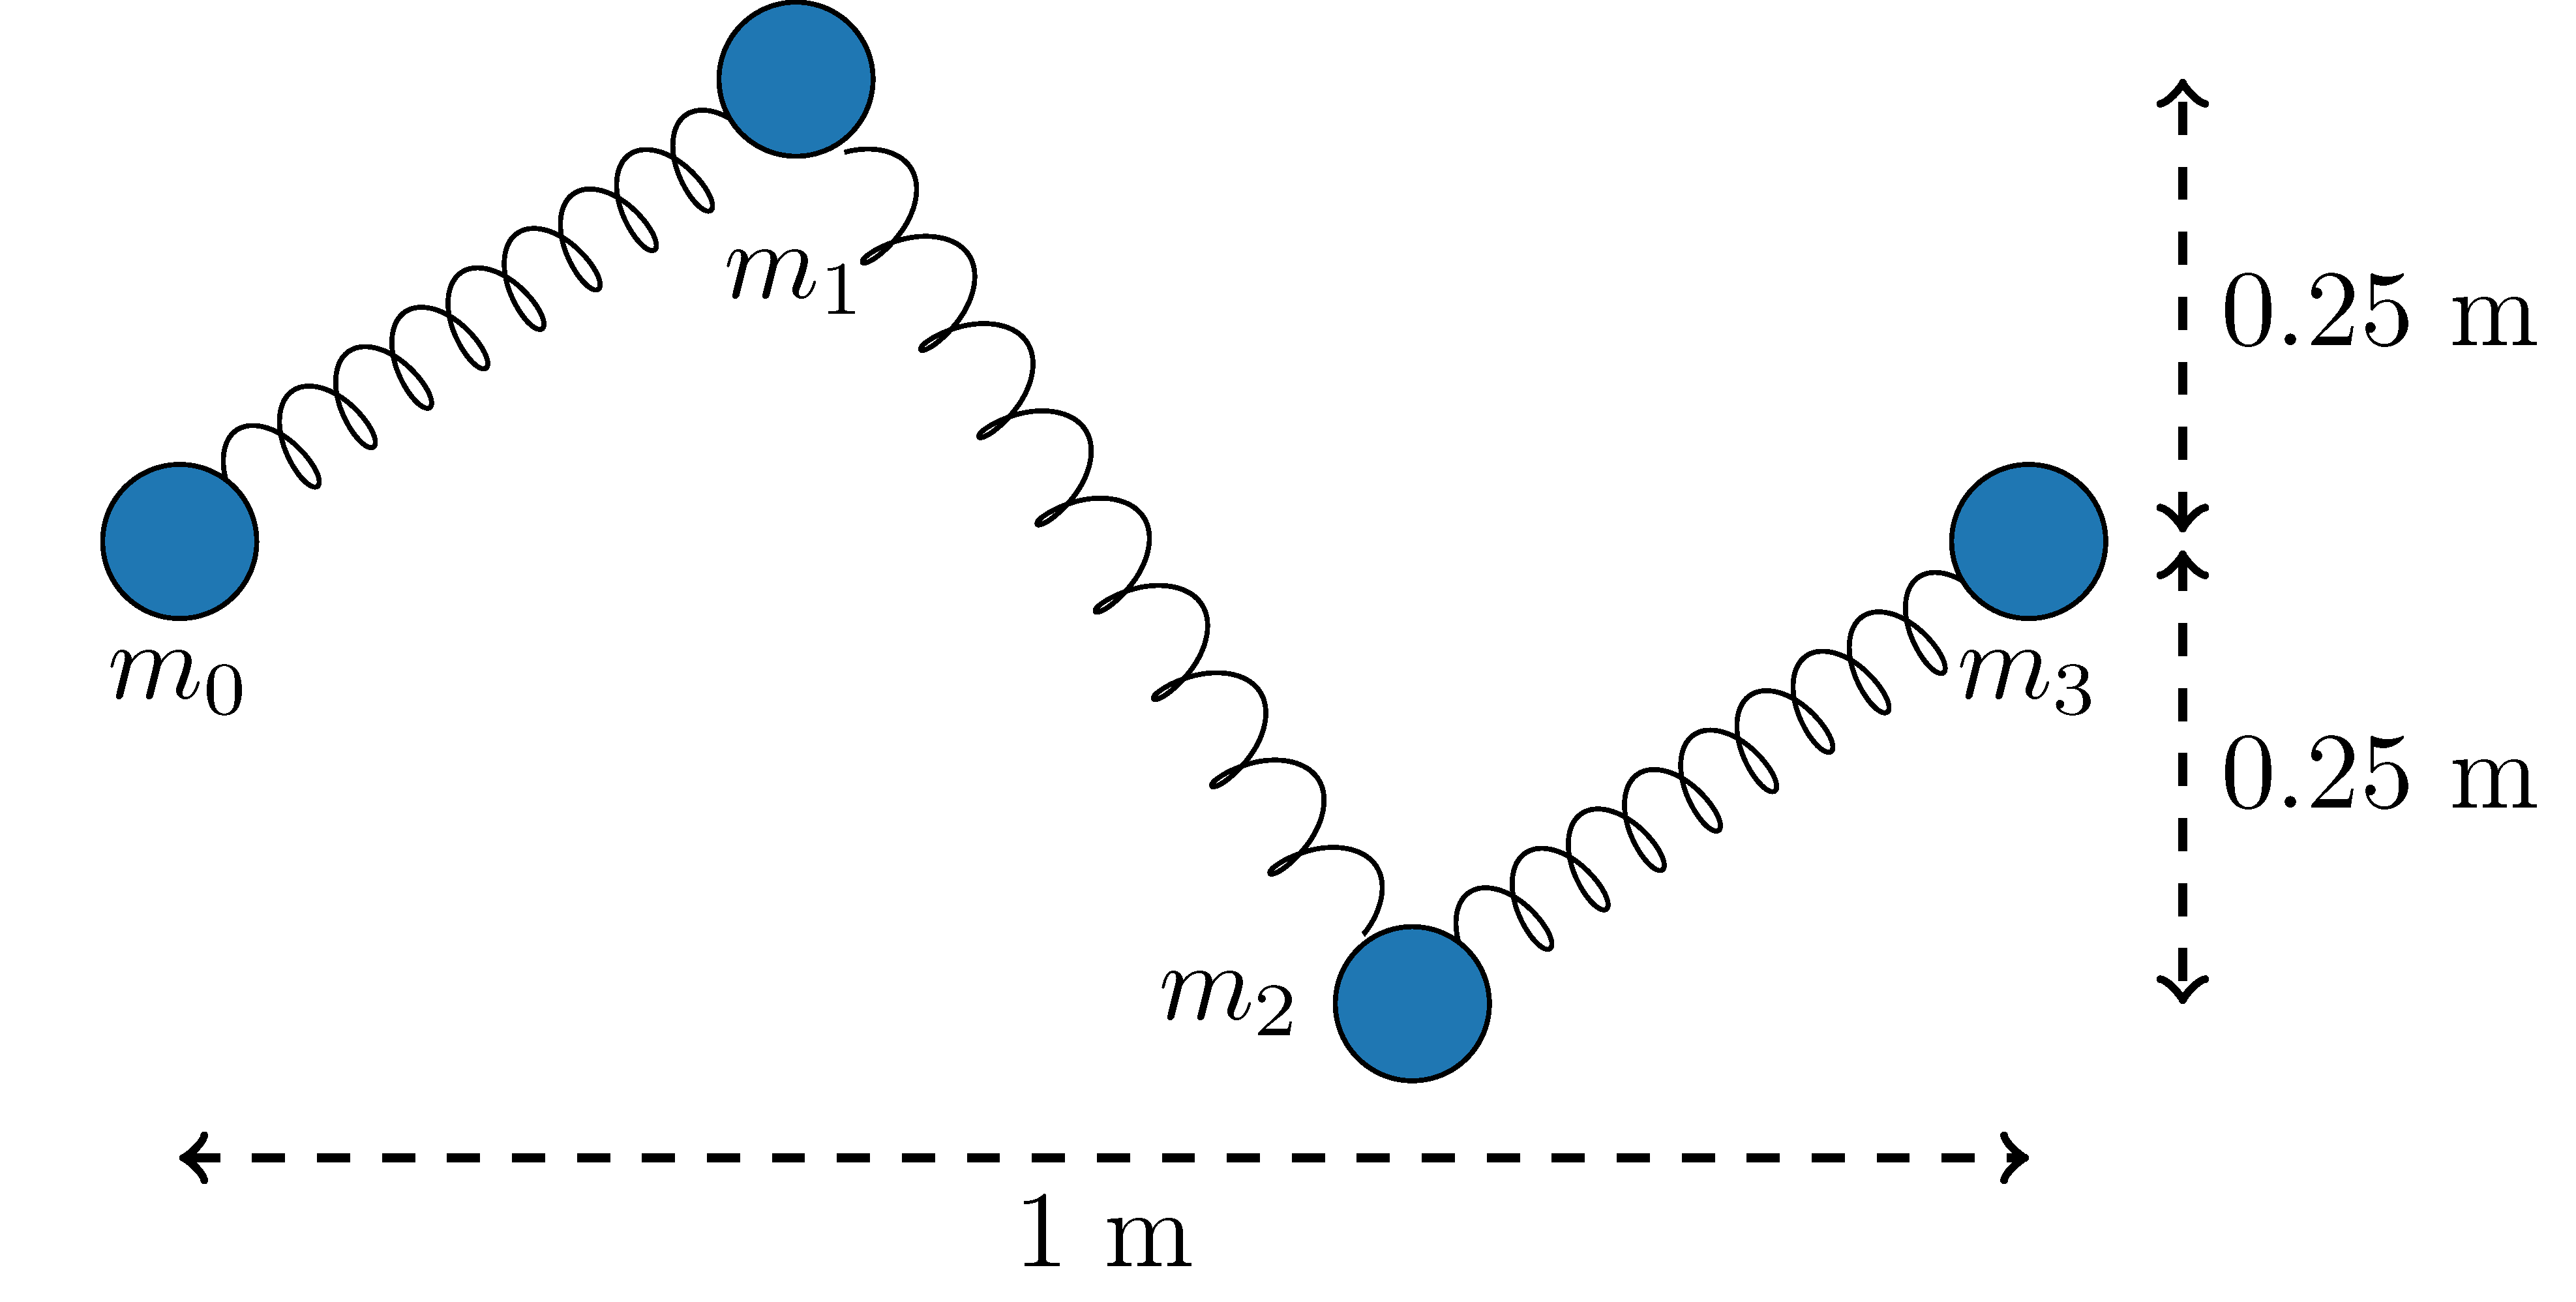

**<font color=red>Code Task 11.7: Define two lists which define the initial positions.** The $x$ coordinates have been defined for you (try adding `print(x_pos)` to see what they look like). The two lists for the $y$ coordinates should be defined as in the figure above.

In [ ]:
x_pos = np.linspace(0,1,4)
y_pos_1 = ???  ### Your code goes here ###
y_pos_2 = ???  ### Your code goes here ###

length = len(x_pos)

**<font color=red>Code Task 11.8: Run the code below without editing.  You should recognize the figure that is created.** 

In [ ]:
# If you've defined y_pos_1 and y_pos_2 correctly, the plot produced by this cell should look like the diagrams above.

fig, ax = plt.subplots(1,2)

ax[0].set_xlim((  0, 1))
ax[0].set_ylim(( -0.5, 0.5))
ax[0].plot([-1,1], [0,0], color='C1', lw=2)
ax[0].plot(x_pos, y_pos_1, '.', markersize=24, lw=2)

ax[1].set_xlim((  0, 1))
ax[1].set_ylim(( -0.5, 0.5))
ax[1].plot([-1,1], [0,0], color='C1', lw=2)
ax[1].plot(x_pos, y_pos_2, '.', markersize=24, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()

**<font color=blue>Problem 11.11: Compare the figure you made in code task 8 to the figure given at the begining of this section.**

_Double click this cell to begin editing. Write your answer here._

We are going to create lists of masses using the $x$ and $y$ position lists defined above. You don't need to know how this works exactly, but we're using the `y_pos_1` and `y_pos_2` defined above to set the initial positions of each of the four balls in `ball_list_1` and `ball_list_2`.

**<font color=red>Code Task 11.9: Run the code below without editing.** 

In [ ]:
mass = 1

ball_list_1 = [ball(m=mass, r=np.array([x_pos[i],y_pos_1[i],0])) for i in range(length)]
ball_list_2 = [ball(m=mass, r=np.array([x_pos[i],y_pos_2[i],0])) for i in range(length)]

Note that we can access the $i$th ball with `ball_list_1[i]`. For example, the first non-stationary ball at at $i=1$ should be at position $(x,y,z)=(0.33,0.25,0)$. Is it?

**<font color=red>Code Task 11.10: Run the code below without editing to check that you array from code task 7 is correct.** 

In [ ]:
print(ball_list_1[1].r)

To make our code more compact later in the lab, we will create a function to perform the simulation. This is very similar to the simulation code used in previous labs and in Part 1, but with a few extra for loops since we have to iterate over each ball in `ball_list`.

First, we create some empty arrays (`a_array`, `v_array`, and `r_array`) to store our data in. The interior of the loop is very similar to code in previous labs, and the loop structure allows us to iterate over each ball in `ball_list`.

Next, we iterate over each time step as we did in previous labs. As in previous labs we will need to do three main things:

* Update acceleration `a` (using the spring force this time) and save the new acceleration value in a list `a_array`
* Update velocity `v` and save the new velocity value in a list `v_array`
* Update position `r` and save the new position value in a list `r_array`

However, we will need to update each of these for each ball in `ball_list`, so we will use three for loops.*

**Do not edit the following code block.** Instead, read through the code below and the description above and answer the questions below.


<sup>* Sidenote: We actually do need to break acceleration, velocity, and position up into multiple for loops (although we could get away with two). Since the acceleration of each ball depends on the position of its neighbors, we need to update the acceleration of each ball before we update the postions.</sup>

**<font color=red>Code Task 11.11: Run the code below without editing.** 

In [ ]:
def simulate(ball_list, times, dt):
    '''
    This runs a simulation on a list of balls named ball_list.
    times is a list of times to simulate over, with time step dt.
    '''
    
    # Defining some constants
    length = len(ball_list)
    N = times.size
    
    # First we create empty arrays to store data in
    for i in range(length):  
        ball_list[i].a_array = np.empty((N,3))
        ball_list[i].a_array[0] = ball_list[i].a
        ball_list[i].v_array = np.empty((N,3))
        ball_list[i].v_array[0] = ball_list[i].v
        ball_list[i].r_array = np.empty((N,3))
        ball_list[i].r_array[0] = ball_list[i].r
    
    i = 1
    for t in times[1:]:  # iterate over times

        # Update accelerations
        for j in range(0,length):  # iterate over balls in ball_list
            if j != 0 and j != length - 1:
                dr_left = ball_list[j].r - ball_list[j-1].r
                dr_right = ball_list[j].r - ball_list[j+1].r
                ball_list[j].a = (spring_force(dr_left, L0, k) + spring_force(dr_right, L0, k)) / ball_list[j].m
            ball_list[j].a_array[i] = ball_list[j].a  # append the new value to the list
        
        # Update velocities
        for j in range(0,length):  # iterate over balls in ball_list
            if j != 0 and j != length - 1:
                ball_list[j].v = ball_list[j].v + ball_list[j].a * dt
            ball_list[j].v_array[i] = ball_list[j].v  # append the new value to the list

        # Update positions
        for j in range(0,length):  # iterate over balls in ball_list
            if j != 0 and j != length - 1:
                ball_list[j].r = ball_list[j].r + ball_list[j].v * dt
            ball_list[j].r_array[i] = ball_list[j].r  # append the new value to the list

        # Update iteration count
        i = i + 1
       
    return ball_list

**<font color=blue>Problem 11.12: What does the following block of code from above do? What is the physical interpretation?**
    
    dx_left = ball_list[j].r - ball_list[j-1].r
    dx_right = ball_list[j].r - ball_list[j+1].r
    ball_list[j].a = (spring_force(dx_left, dx0, k) + spring_force(dx_right, L0, k)) / ball_list[j].m

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 11.13: What does `if j != 0 and j != length - 1:` from the code above do? Why do we need to include it? (Hint: `!=` means not equal to.)**

_Double click this cell to begin editing. Write your answer here._

We use the `simulate` function defined above to run the simulation.

**<font color=red>Code Task 11.12: Run the code below without editing.** 

In [ ]:
L0 = 0
k = 30

T = 5
dt = 0.05
times = np.arange(0, T+dt, dt)
N = times.size

ball_list_1 = simulate(ball_list_1,times,dt)
ball_list_2 = simulate(ball_list_2,times,dt)

Let's also plot the position of just the second ball (the first one that moves, $m_1$).  This will give us a better idea of the difference in movement between the two different initial conditions.

**<font color=red>Code Task 11.13: Run the code below without editing to see the results of the simulations.** 

In [ ]:
 fig, axs = plt.subplots()
axs.set_xlim((  0, 1))
axs.set_ylim(( -0.5, 0.5))
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=24, lw=2)
plt.close()

anim_1 = animation.FuncAnimation(fig, animate_ball_list(ball_list_1), init_func=init, frames=N, interval=40)
anim_2 = animation.FuncAnimation(fig, animate_ball_list(ball_list_2), init_func=init, frames=N, interval=40)

fig, axs = plt.subplots(2,1)

axs[0].plot(times, ball_list_1[1].r_array[:,1], '.')
axs[0].set_ylabel('Position')
axs[0].set_xlabel('Time')
axs[0].set_title('Initial Condition 1')

axs[1].plot(times, ball_list_2[1].r_array[:,1], '.')
axs[1].set_ylabel('Position')
axs[1].set_xlabel('Time')
axs[1].set_title('Initial Condition 2')

fig.set_size_inches(12,6)
fig.tight_layout()

**<font color=blue>Problem 11.14: What do you notice about the difference between the two different initial conditions for just the position of the second ball?**

_Double click this cell to begin editing. Write your answer here._

Now, let's run the code below to see the results of the simulations for all four balls.

**<font color=red>Code Task 11.14: Run the two cells below to show the two animations.** 

In [ ]:
anim_1

In [ ]:
anim_2

**<font color=blue>Problem 11.15: How does the motion from these two initial conditions compare?**

_Double click this cell to begin editing. Write your answer here._

Now let's try a slightly different set of initial conditions.  These are given for you.

**<font color=red>Code Task 11.15: Run the cell below to plot the new set of initial conditions.** 

In [ ]:
y_pos_3 = [0,0.25,0,0]

length = len(x_pos)

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.5, 0.5))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos_3, '.', markersize=24, lw=2)

fig.set_size_inches(4,4)
fig.tight_layout()

**<font color=blue>Problem 11.16: Discuss the new initial conditions.  Additionally, make a hypothosis on the movement of this system.**

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 11.16: Run the three code cells below to plot and animate the movement of this new set of initial conditions.** 

In [ ]:
mass = 1

ball_list_3 = [ball(m=mass, r=np.array([x_pos[i],y_pos_3[i],0])) for i in range(length)]

L0 = 0
k = 30

T = 10
dt = 0.05
times = np.arange(0, T+dt, dt)
N = times.size

ball_list_3 = simulate(ball_list_3,times,dt)

In [ ]:
fig, axs = plt.subplots(1,1)

axs.plot(times, ball_list_3[1].r_array[:,1], '.')
axs.set_ylabel('Position')
axs.set_xlabel('Time')

fig.set_size_inches(12,3)
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots()
axs.set_xlim((  0, 1))
axs.set_ylim(( -0.5, 0.5))
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=24, lw=2)
plt.close()

anim_3 = animation.FuncAnimation(fig, animate_ball_list(ball_list_3), init_func=init, frames=N, interval=40)

anim_3

**<font color=blue>Problem 11.17: How is the motion from this initial condition different from the previous two?  Did this match your hypothosis?**

_Double click this cell to begin editing. Write your answer here._

# Part Four: Waves on a String (Physical)
---
At your lab station you should also find a wave generator, some string, and a pulley. Adjust the pulley so that a string runs from the agitator on the wave generator, and is flat and level as it runs over the top of the pulley, and off the table. Hang a 250g mass at the end of the string to provide some tension. The distance between the wave generator and the point where the string contacts the pulley should be 1 m. See diagram:

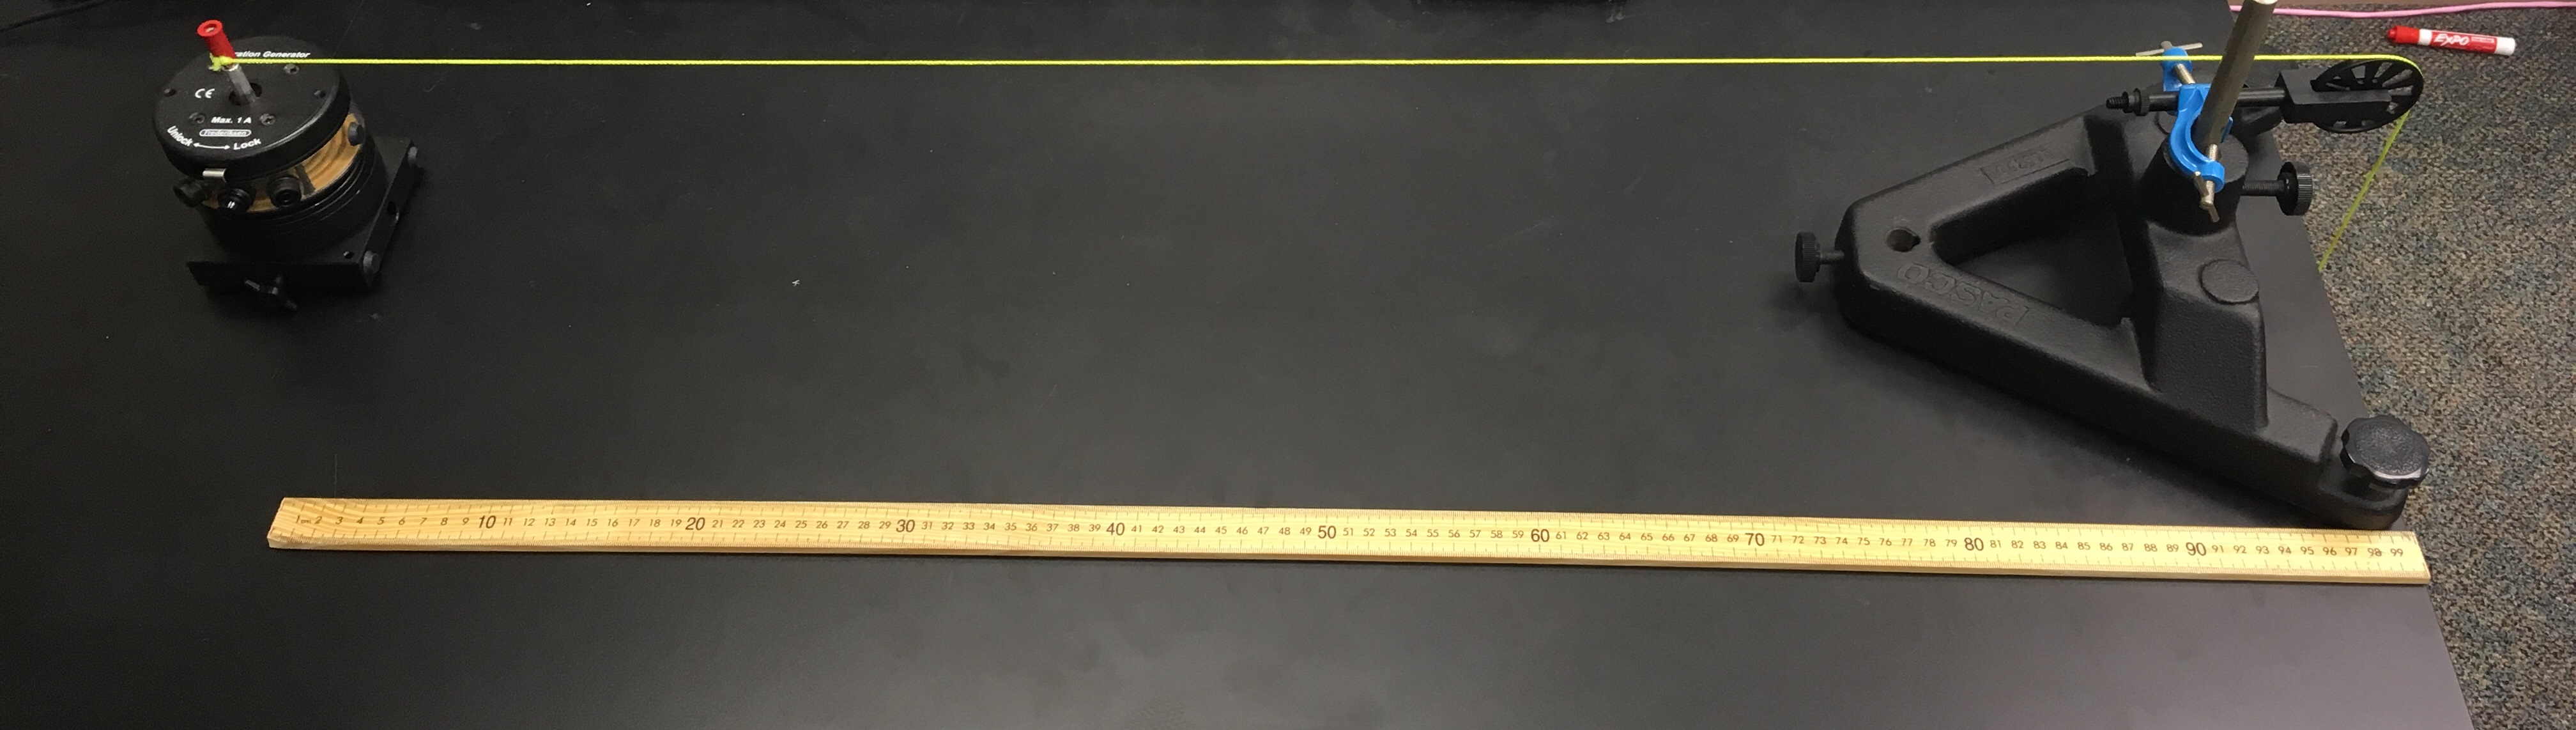

This system generates waves on the string. We can adjust the frequency we drive the system at using the function generator. Start with it set to a low frequency, but a high amplitude. Gradually increase the frequency, from a few Hz through a few hundred Hz.
    
**<font color=green> Note:For the online version of this course, you will be given a video of this.  You should hase your answers on the video.**
    
   
**<font color=blue>Problem 11.18: Describe the motion of the string and any patterns that emmerge while you increase the frequency output by the function generator.**

_Double click this cell to begin editing. Write your answer here._

One pattern you might observe durring your frequency sweep is called a **Standing Wave**. A Standing Wave occurrs when 2 waves of the same frequency propagate through a medium, in opposite directions.  In this case, it is the wave and its reflection traveling back towards it.  When this occurs, the wave pattern on the string appears to "freeze" (stand still).  See the gif below, which has two standing waves, and their superposition.

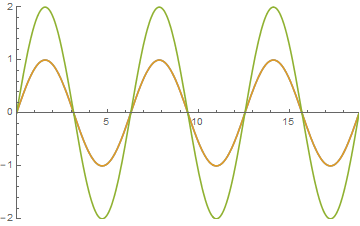

This reflection can only occur when the wavelength of the wave on the string lines make half-integer multiples of the length of the string. You may note that the shape the string makes in these cases are sine waves, and that discrete "nodes" form along the string, where the string doesn't appear to move very much, or doesn't move at all. There are also discrete "antinodes" between these nodes, where the point on the sting moves the most. The number of antinodes is sometimes referred to as the mode number, and indicates a way to lable the resonant mode of the movement we see.


**<font color=blue>Problem 11.19: Sweep through the frequencies on the function generator a second time. This time, pause when a standing wave appears on the string. Record the number of antinodes, and the frequency the function generator operates at when that pattern forms.**
    
**<font color=green>Note: For the online version of this course, these numbers should be visible in the video from above.**

| Mode number | Frequency |  
|-------------|-----------|
|             |           | 
|             |           |
|             |           |
|             |           |
|             |           |

**<font color=red>Code Task 11.17: Plot the data you measured below, using the provided template.**

In [ ]:
modes = []  # Put your data here!
frequency =[]  # Put your data here!


fig, ax = plt.subplots(1,1)
ax.plot(modes, frequency, 'ko')
ax.set_title("")
ax.set_xlabel("Modes")
ax.set_ylabel("Frequency (Hz)")

fig.set_size_inches(4,4)
fig.tight_layout()

**<font color=blue> Problem 11.20: In what ways could this system be similar to the spring/mass systems we studied in Part one - three? What are some important differences between these systems?**

_Double click this cell to begin editing. Write your answer here._

# Cumulative Assessment Task (CAT): Simulating Waves on a String
---
So far all the simulations in this course have involved only single objects or a small number of simple objects. The string from Part three is not a simple object.  It can bend and flex in arbitrary directions. However, we can use the tools we've developed throughout this course to create a qualitatively accurate simulation of this object.

All the simulations we've done previously work by breaking time up into small time steps to model behavior that changes over time. We will extend this idea to work over postion too. We will divide the string up into small chunks.

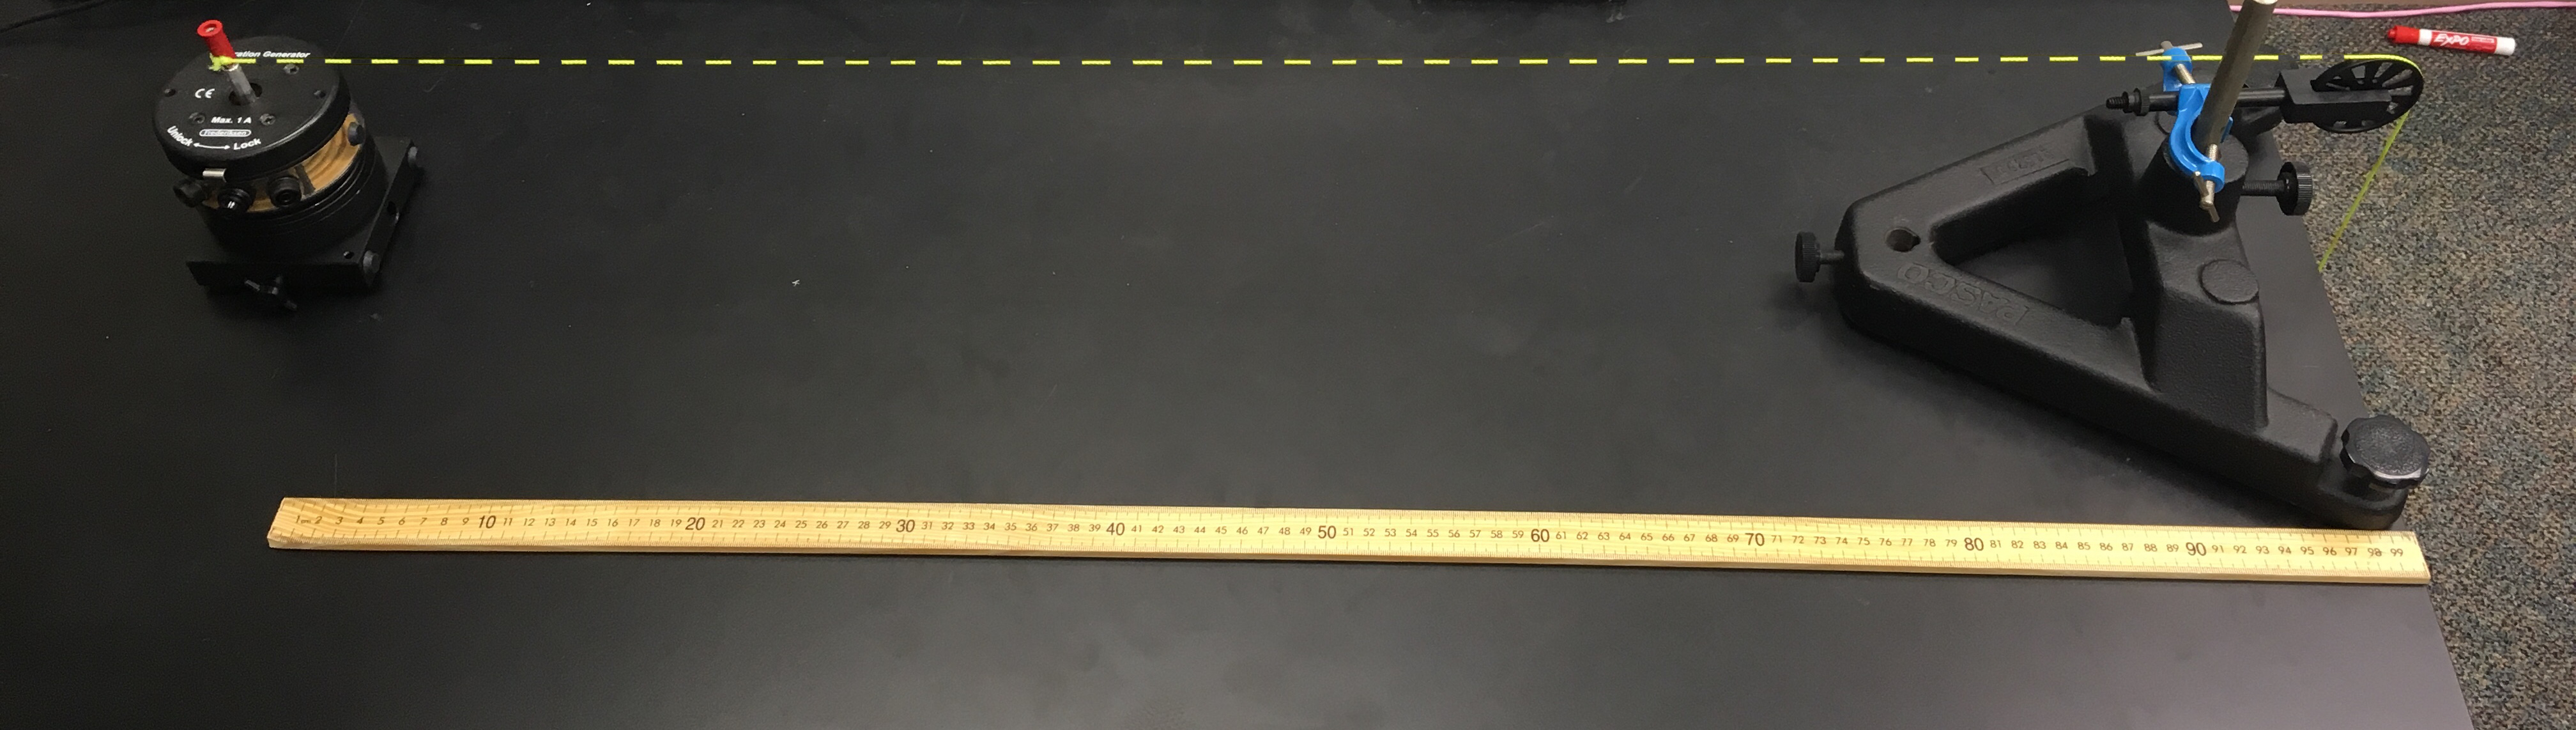

We can model the string with a system like that shown below. Note the similarities to the system we studied in Part 3.

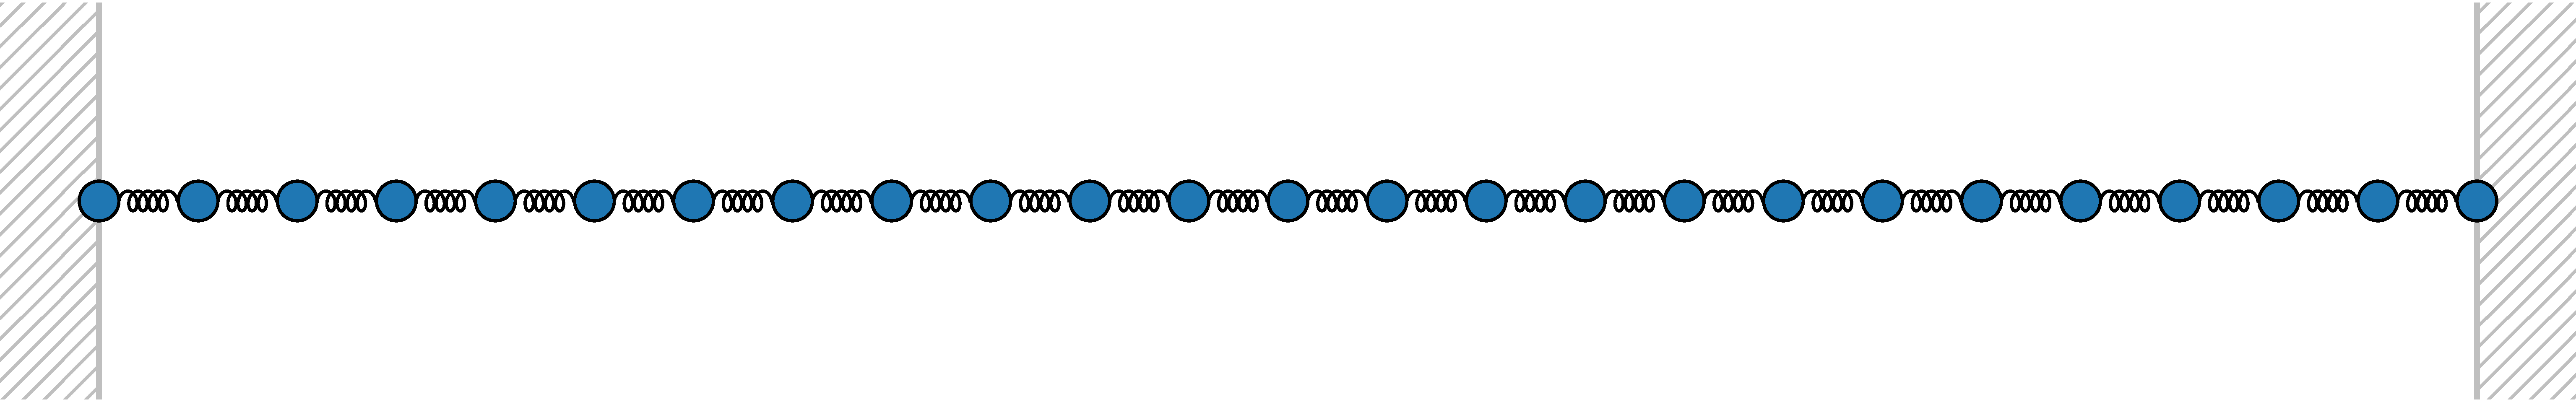

**<font color=blue> Problem 11.21: Why does it make sense to connect these masses with springs?**

_Double click this cell to begin editing. Write your answer here._

The way that the `simulate` function code has been written is very general, and can easily accommodate more masses. We will again set the initial conditions, and then let the system naturally evolve.

First let's try to simulate the first fundamental mode on the string (it has two nodes and one antinode). 

**<font color=red>Code Task 11.18: Define the initial positions of the first mode (fundamental) on the string.** You may find the predefined function `np.sin(x)` (which can take an array such as `x_pos` as input) to be helpful.  You should set the amplitude to 0.2, for convenience.

In [ ]:
length = 51

x_pos = np.linspace(0,1,length)
y_pos = ???  ### Your code goes here ###

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()

You can check yourself at this point.  Does the figure from code task 18 match what the first mode (fundamental) from part four looked like?  If not, adjust your code until it does.  



We can just use the same code from above to simulate (`mass` and `L0` have been set so the system evolves in a reasonable amount of time).

**<font color=red>Code Task 11.19: Run the two cells below to animate the first mode (fundamental) you defined in code task 18.** 

In [ ]:
mass = 1

ball_list = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

L0 = 0
k = 60

T = 15
dt = 0.05
times = np.arange(0, T+dt, dt)
N = times.size

ball_list = simulate(ball_list,times,dt)

In [ ]:
fig, axs = plt.subplots()
axs.set_xlim((  0, 1))
axs.set_ylim(( -0.25, 0.25))
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=12, lw=2)
fig.set_size_inches(8,4)
plt.close()

anim = animation.FuncAnimation(fig, animate_ball_list(ball_list), init_func=init, frames=N, interval=20)

anim

**<font color=blue> Problem 11.22: Does this animation match what you saw in part four?**

_Double click this cell to begin editing. Write your answer here._

Now, let's simulated the higher order modes!  First, start with mode number 3. 

**<font color=red>Code Task 11.20: Using the variable, `mode`, rewrite `y_pos` so that higher order modes can be easily simulated based upon the `mode` variable.**
    
You should easily be able to change the value of the variable `mode` and change which order you are simulating.

In [ ]:
length = 51

mode = 3

x_pos = np.linspace(0,1,length)
y_pos = ???  ### Your code goes here ###

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()

**<font color=red>Code Task 11.21: Run the two cells below to animate the string movement defined in code task 20.**

In [ ]:
mass = 1

ball_list = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

L0 = 0
k = 60

T = 15
dt = 0.05
times = np.arange(0, T+dt, dt)
N = times.size

ball_list = simulate(ball_list,times,dt)

In [ ]:
fig, axs = plt.subplots()
axs.set_xlim((  0, 1))
axs.set_ylim(( -0.25, 0.25))
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=12, lw=2)
fig.set_size_inches(8,4)
plt.close()

anim = animation.FuncAnimation(fig, animate_ball_list(ball_list), init_func=init, frames=N, interval=20)

anim

 Now, you can go back and edit code task 20, and change the mode number.  Re-run code task 21 to update the animation.   

 **<font color=blue> Problem 11.23: What happens to the oscilation frequency as the number of modes is increased?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue> Problem 11.24: How does this compare (qualitatively) to your results from Part four?**

_Double click this cell to begin editing. Write your answer here._

### <center>You're done! Submit your lab per the following instructions.<font color=white><#!S!#>

* Save this file with the lab number and group number to submit to canvas, e.g. `group01_lab02.ipynb`. 
* You only need to submit one file as a group to the canvas assignment and it will count for all group members.
* The group recorder should still send the worksheet to their group members so they have a copy.
* Save the file as a html file. You can do this by opening the `File` tab on the top left corner of Jupyter, then select `Download as > html (.html)`
* Submit both the .ipynb and .html files to canvas under the `Lab 11: Sound and Waves` assignment.

# Stretch Goals: Other Things to Try
---
If you have time, try running one of the initial condition code blocks below, followed by the simulation code at the end. Each behaves in different ways and illustrates something interesting about this system. Feel free to experiment by defining your own initial conditions. 

## Initial Conditions

In [ ]:
# Adding Modes

length = 51

mode_1 = 2
mode_2 = 5

x_pos = np.linspace(0,1,length)
y_pos = 0.1 * np.sin(x_pos * np.pi * mode_1) + 0.1 * np.sin(x_pos * np.pi * mode_2)

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()

new_ball_list_0 = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

In [ ]:
# Square

length = 51

x_pos = np.linspace(0,1,length)
y_pos = np.zeros(np.shape(x_pos))
y_pos[21:29] = 0.2

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()

new_ball_list_1 = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

In [ ]:
# Gaussian

length = 101

pulsewidth = 5/length

x_pos = np.linspace(0,1,length)
y_pos = 0.2 * np.e ** (- 1 * ((x_pos - x_pos[int(length/2)])/pulsewidth) ** 2)

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()
new_ball_list_2 = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

In [ ]:
# Triangle

length = 51

x_pos = np.linspace(0,1,length)
y_pos = np.zeros(np.shape(x_pos))
y_pos[0:int(length/2)] = 0.4 * x_pos[0:int(length/2)]
y_pos[int(length/2):] = 0.4 * (np.max(x_pos[0:int(length/2)]) - x_pos[0:int(length/2) + 1])

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()
new_ball_list_3 = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

In [ ]:
# Define your own!

length = 51

x_pos = np.linspace(0,1,length)
y_pos = ???  ### Your code goes here ###

fig, ax = plt.subplots(1,1)

ax.set_xlim((  0, 1))
ax.set_ylim(( -0.25, 0.25))
ax.plot([-1,1], [0,0], color='C1', lw=2)
ax.plot(x_pos, y_pos, '.', markersize=12, lw=2)

fig.set_size_inches(8,4)
fig.tight_layout()
new_ball_list_4 = [ball(m=mass, r=np.array([x_pos[i],y_pos[i],0])) for i in range(length)]

## Simulate and Animate

To change which initial condition you are simulating, change the number of the ball list as defined by the list below.  It is currently set to the first initial condition, two modes.

In [ ]:
mass = 1

#new_ball_list_0: Two Modes
#new_ball_list_1: Square
#new_ball_list_2: Gaussian
#new_ball_list_3: Triangle
#new_ball_list_4: Define Your Own!
ball_list = new_ball_list_0  #Change the ball list number to change which initial condition is used.


L0 = 0
k = 120

T = 25
dt = 0.05
times = np.arange(0, T+dt, dt)
N = times.size

ball_list = simulate(ball_list,times,dt)

In [ ]:
fig, axs = plt.subplots()
axs.set_xlim((  0, 1))
axs.set_ylim(( -0.25, 0.25))
axs.plot([-1,1], [0,0], color='C1', lw=2)
line, = axs.plot([], [], '.', markersize=12, lw=2)
fig.set_size_inches(8,4)
plt.close()

anim = animation.FuncAnimation(fig, animate_ball_list(ball_list), init_func=init, frames=N, interval=40)

anim